In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

data = loadmat('F:\machine-learning-ex3\ex3\ex3data1.mat')

In [42]:
X = data['X']
Y = data['y']

In [43]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Y_onehot = encoder.fit_transform(Y)

C:\Users\hp\Anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [45]:
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [46]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    return J

In [47]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

In [48]:
def backprop(X, y, theta1, theta2, learning_rate):
    
    m = X.shape[0]
    
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    J = 0
    #delta1 = np.zeros(theta1.shape)
    #delta2 = np.zeros(theta2.shape)
    delta1 = theta1
    delta2 = theta2
    
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))

    for t in range(m):
        a1t = a1[t,:]
        z2t = z2[t,:]
        a2t = a2[t,:]
        ht = h[t,:]
        yt = y[t,:]
        
        d3t = ht - yt
        
        z2t = np.insert(z2t, 0, values=np.ones(1))
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, delta1, delta2

In [49]:
"""
    X = np.matrix(X)
    y = np.matrix(y)
    
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))"""

'\n    X = np.matrix(X)\n    y = np.matrix(y)\n    \n    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))\n    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))'

In [50]:
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1

params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

m = X.shape[0]
X = np.matrix(X)
Y = np.matrix(Y)

theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))


In [51]:
#from scipy.optimize import minimize

#fmin = minimize(fun=backprop, x0=params, args=(input_size, hidden_size, num_labels, X, Y_onehot, learning_rate), 
                #method='TNC', jac=True, options={'maxiter': 250,'disp':True})

In [52]:
iters = 50

costs = []
for i in range(iters):
    J, theta1, theta2 = backprop(X, Y, theta1, theta2, learning_rate)
    if(i%5==0):
        costs.append(J)
    

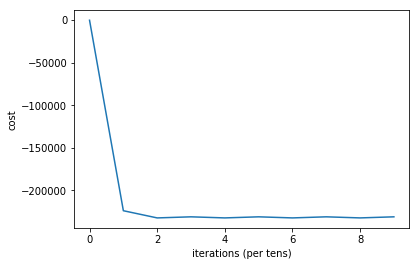

In [53]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [54]:
X = np.matrix(X)
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1) + 1)

In [55]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, Y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print('accuracy = ',end='')
print(accuracy * 100,end='')
print('%')

accuracy = 99.56%
